In [1]:
     ## Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, chi2

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,   
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)

In [2]:
data = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
y = data["Y"]
X= data.drop(columns = ['Y'])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [4]:
##using a decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
pred_test_dt = dt.predict(X_test)
print("ACCURACY:",metrics.accuracy_score(Y_test,pred_test_dt))

ACCURACY: 0.47368421052631576


In [5]:
pred_test_dt = dt.predict(X_train)
print("ACCURACY:",metrics.accuracy_score(Y_train,pred_test_dt))


ACCURACY: 0.9439252336448598


In [6]:
parameters = [ {'max_depth': [2, 4, 6, 10], 'min_samples_leaf': [2, 3, 4, 5, 7], 'min_samples_split' : [2, 3, 4, 5]}]


In [7]:
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)

In [8]:
grid_search.best_score_

0.6365079365079365

In [9]:
grid_search.best_params_


{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [10]:
pred_test_dt = grid_search.predict(X_test)
print("ACCURACY:",metrics.accuracy_score(Y_test, pred_test_dt))

ACCURACY: 0.5789473684210527


In [11]:
pred_test_dt = grid_search.predict(X_train)
print("ACCURACY:",metrics.accuracy_score(Y_train, pred_test_dt))

ACCURACY: 0.7570093457943925


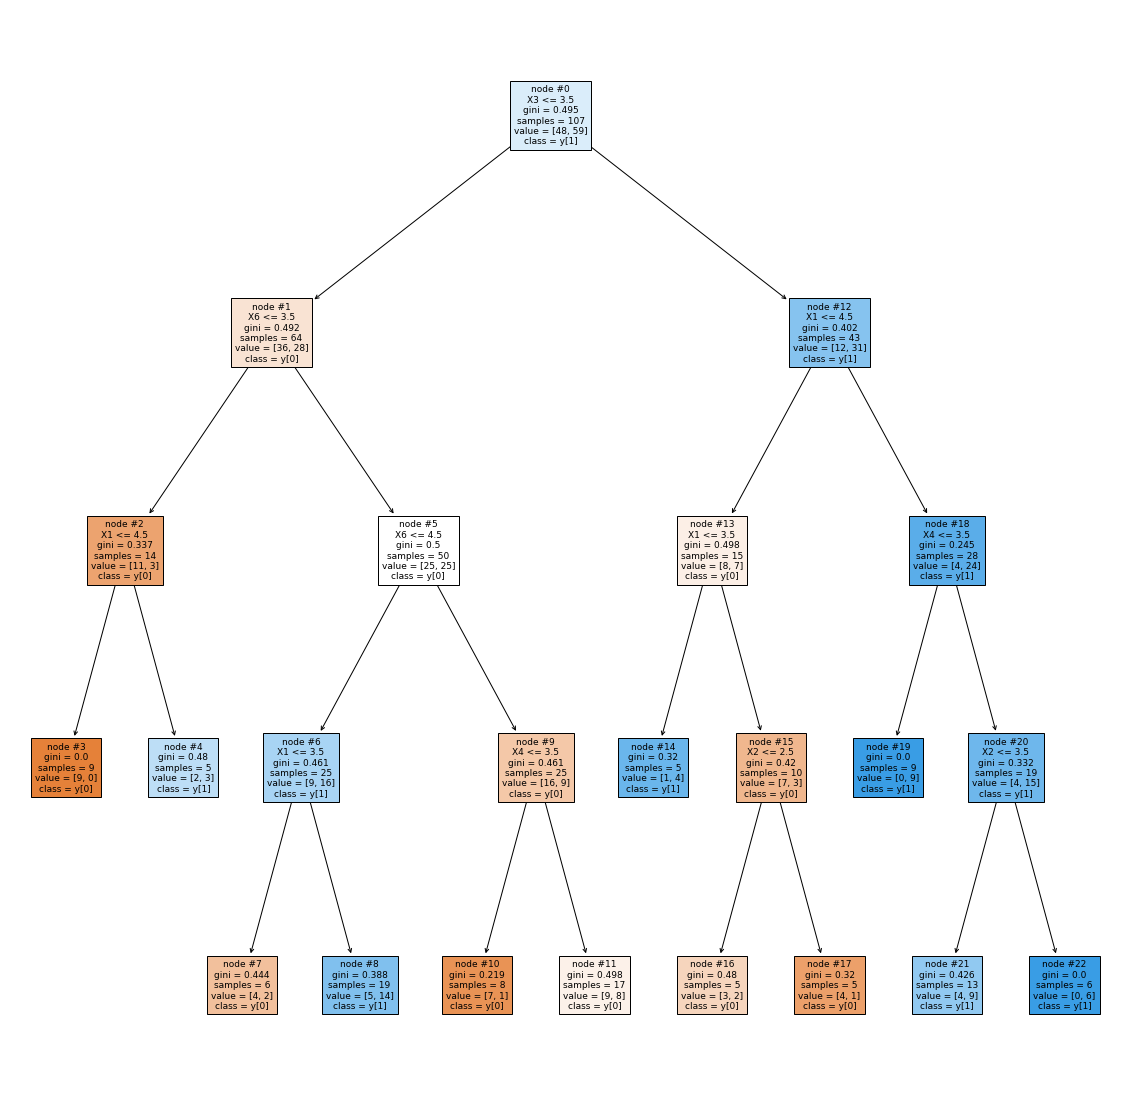

In [12]:
features = list(X.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(grid_search.best_estimator_,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [13]:
TrainX = X_train.drop(columns = ["X4"], axis=1)
TestX = X_test.drop(columns = ["X4"], axis=1)

In [14]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [15]:

pred_test_dt = dt.predict(X_test)
print("ACCURACY:",metrics.accuracy_score(Y_test, pred_test_dt))

ACCURACY: 0.5789473684210527


In [16]:

pred_test_dt = dt.predict(X_train)
print("ACCURACY:",metrics.accuracy_score(Y_train, pred_test_dt))

ACCURACY: 0.7757009345794392


In [17]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt.fit(TrainX,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [18]:
pred_test_dt = dt.predict(TestX)
print("ACCURACY:",metrics.accuracy_score(Y_test, pred_test_dt))

ACCURACY: 0.5263157894736842


In [19]:
pred_test_dt = dt.predict(TrainX)
print("ACCURACY:",metrics.accuracy_score(Y_train, pred_test_dt))

ACCURACY: 0.7289719626168224


In [20]:
TrainX = X_train.drop(columns = ["X3","X4", "X6"], axis=1)
TestX = X_test.drop(columns = ["X3","X4", "X6"], axis=1)

In [21]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt.fit(TrainX,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [22]:
pred_test_dt = dt.predict(TestX)
print("ACCURACY:",metrics.accuracy_score(Y_test, pred_test_dt))

ACCURACY: 0.7368421052631579


In [23]:
pred_test_dt = dt.predict(TrainX)
print("ACCURACY:",metrics.accuracy_score(Y_train, pred_test_dt))

ACCURACY: 0.6822429906542056
